In [45]:
%matplotlib inline

import matplotlib.pylab
import matplotlib.pyplot as plt
import pandas as pd
import dateutil.parser as du

plt.style.use('ggplot')

# 2015-09-27T17:04:34+01
dateparse = lambda x: pd.to_datetime(x, format="%Y-%m-%dT%H:%M:%S", exact=False)
dateparse("2015-09-27T17:04:34+01")
id_df = pd.read_csv('id.csv', parse_dates=[0], date_parser=dateparse, header=0, index_col=[0])
uuid_df = pd.read_csv('uuid.csv', parse_dates=[0], date_parser=dateparse, header=0, index_col=[0])
id_df[:1]

,duration
time,
2015-09-29 21:48:58,0


In [46]:
print id_df.index.max() - id_df.index.min()
print uuid_df.index.max() - uuid_df.index.min()

0 days 01:10:48
0 days 01:28:19


MEDIAN 1.0
95PCTL 18.0
99PCTL 21.0
MAX 305
MEDIAN 2381.0
95PCTL 2421.0
99PCTL 2437.0
MAX 2465


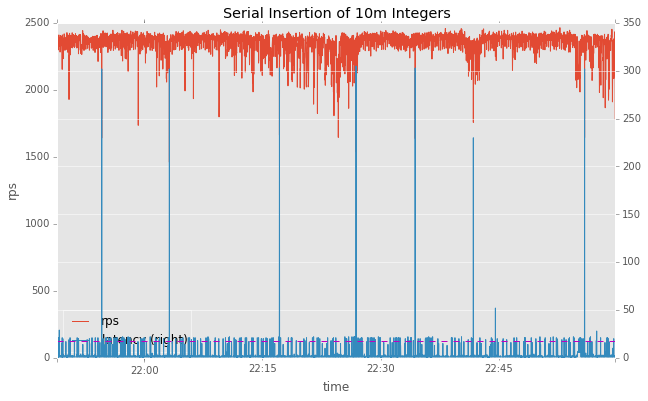

In [43]:
gb_df = id_df.groupby(pd.TimeGrouper(freq='1s')).count()
gb_df['max'] = id_df.groupby(pd.TimeGrouper(freq='1s')).max()['duration']
gb_df.columns = ['rps', 'latency']
print "MEDIAN", gb_df['latency'].quantile(.5)
print "95PCTL", gb_df['latency'].quantile(.95)
print "99PCTL", gb_df['latency'].quantile(.99)
print "MAX", gb_df['latency'].max()

print "MEDIAN", gb_df['rps'].quantile(.5)
print "95PCTL", gb_df['rps'].quantile(.95)
print "99PCTL", gb_df['rps'].quantile(.99)
print "MAX", gb_df['rps'].max()
ax = gb_df.plot(figsize=(10,6), secondary_y=['latency'], title="Serial Insertion of 10m Integers")
plt.axhline(gb_df['latency'].quantile(.95), color='m', linestyle="--", label="95PCTL")
ax.set_ylabel("rps")

MEDIAN 21.0
95PCTL 27.0
99PCTL 53.0
MAX 665
MEDIAN 1817.0
95PCTL 2333.0
99PCTL 2363.0
MAX 2399


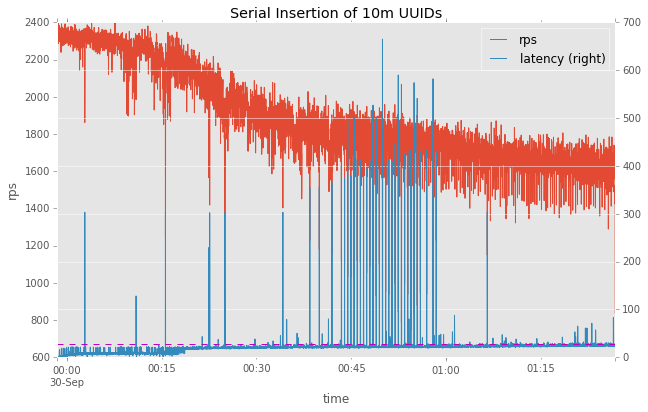

In [47]:
uuid_gb_df = uuid_df.groupby(pd.TimeGrouper(freq='1s')).count()
uuid_gb_df['max'] = uuid_df.groupby(pd.TimeGrouper(freq='1s')).max()['duration']
uuid_gb_df.columns = ['rps', 'latency']
pctl = uuid_gb_df['latency'].quantile(.95)
print "MEDIAN", uuid_gb_df['latency'].quantile(.5)
print "95PCTL", uuid_gb_df['latency'].quantile(.95)
print "99PCTL", uuid_gb_df['latency'].quantile(.99)
print "MAX", uuid_gb_df['latency'].max()

print "MEDIAN", uuid_gb_df['rps'].quantile(.5)
print "95PCTL", uuid_gb_df['rps'].quantile(.95)
print "99PCTL", uuid_gb_df['rps'].quantile(.99)
print "MAX", uuid_gb_df['rps'].max()
ax = uuid_gb_df.plot(figsize=(10,6), secondary_y=['latency'], title="Serial Insertion of 10m UUIDs")
pctl = uuid_gb_df['latency'].quantile(.95)
plt.axhline(pctl, color='m', linestyle="--", label="95PCTL")
ax.set_ylabel("rps")